Простой анализ данных в Pandas. Деревья решений, Random Forest

In [103]:
import numpy as np
import pandas
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, f1_score

%matplotlib inline

http://pandas.pydata.org/pandas-docs/stable/10min.html

In [69]:
df = pandas.read_csv('titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
#df.info()
print(df.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000         NaN    0.000000    0.000000    7.910400
50%      0.000000    3.000000         NaN    0.000000    0.000000   14.454200
75%      1.000000    3.000000         NaN    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [71]:
print("The median age is {} years".format(df['Age'].median()))

The median age is 28.0 years


In [72]:
df = df.dropna()
# удалила очень много строк; с NaN стоит работать аккуратнее — например, заменять их на средние значения этого признака...
x_labels = ['Pclass', 'Fare', 'Age', 'Sex']
X, y = df[x_labels], df['Survived']
X.head()

,Pclass,Fare,Age,Sex
PassengerId,,,,
2,1,71.2833,38.0,female
4,1,53.1000,35.0,female
7,1,51.8625,54.0,male
11,3,16.7000,4.0,female
12,1,26.5500,58.0,female


In [73]:
print(X['Sex'].unique())
X['Sex'] = X['Sex'].map({'female': 0, 'male':1}).astype(int)
# хорошо использовать pandas.get_dummies
print(X['Sex'].unique())

['female' 'male']
[0 1]


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [74]:
y.head()

PassengerId
2     1
4     1
7     0
11    1
12    1
Name: Survived, dtype: int64

In [75]:
#X.describe()
y.describe()

count    183.000000
mean       0.672131
std        0.470725
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

## Деление выборки на training set & test set

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [79]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_test.describe()

(128, 4) (55, 4) (128,) (55,)


,Pclass,Fare,Age,Sex
count,55.000000,55.000000,55.000000,55.000000
mean,1.218182,86.228256,37.009091,0.563636
std,0.533712,88.711171,16.426743,0.500505
min,1.000000,5.000000,2.000000,0.000000
25%,1.000000,27.735400,27.000000,0.000000
50%,1.000000,57.000000,36.500000,1.000000
75%,1.000000,112.079150,49.500000,1.000000
max,3.000000,512.329200,70.000000,1.000000


## Decision Tree

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [80]:
clf = DecisionTreeClassifier(min_samples_split=5)

In [81]:
clf.fit(np.array(X_train), np.array(y_train))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [82]:
importances = pandas.Series(clf.feature_importances_, index=x_labels)
print(importances)

Pclass    0.000000
Fare      0.382463
Age       0.265982
Sex       0.351555
dtype: float64


In [84]:
y_pred = clf.predict(X_test)

In [87]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.36      0.42      0.39        19
          1       0.67      0.61      0.64        36

avg / total       0.56      0.55      0.55        55



In [93]:
# вместо X_train, y_train здесь хорошо давать всю размеченную коллекцию
print(np.mean(cross_val_score(clf, X_train, y_train, cv=5))) 

0.787931623932


## Random Forest ##

In [94]:
model = RandomForestClassifier(n_estimators = 100)

In [95]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.62      0.68      0.65        19
          1       0.82      0.78      0.80        36

avg / total       0.75      0.75      0.75        55



если надо варьировать много параметров, используйте grid search:
http://scikit-learn.org/stable/modules/grid_search.html#grid-search

In [104]:
scores = []
for t in range(1,100):
    rfc = RandomForestClassifier(n_estimators=t)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
#     rfc.fit(X_train, y_train)
#     y_pred = rfc.predict(X_test)

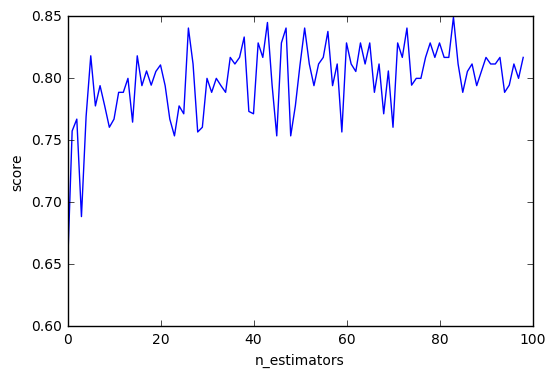

In [105]:
plt.plot(scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()